In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import bloscpack as bp

import sys
import os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from annotation_utilities import *
from registration_utilities import *
from vis3d_utilities import *
from metadata import *
from data_manager import *

import time

import matplotlib.pyplot as plt
%matplotlib inline

Setting environment for Local Macbook Pro


In [2]:
with open('colors.txt', 'r') as f:
    colors = {l[0]: np.r_[float(l[1]), float(l[2]), float(l[3])] for l in map(lambda x: x.split(), f.readlines())}

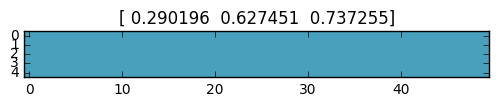

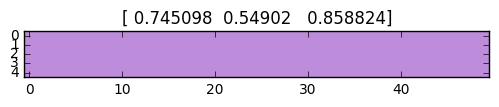

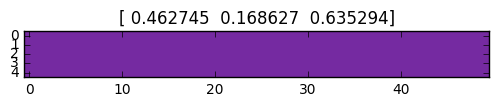

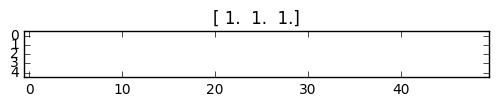

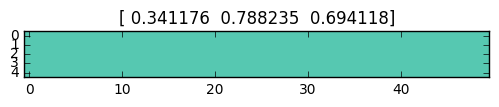

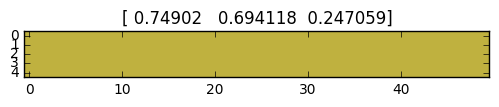

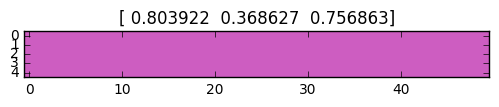

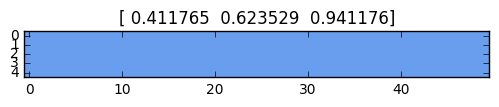

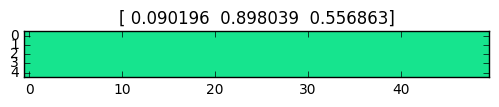

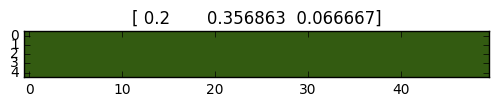

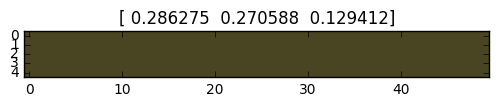

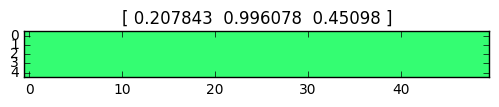

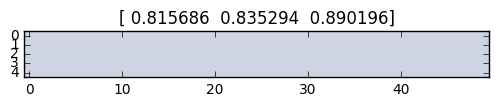

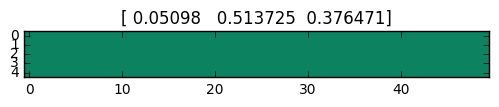

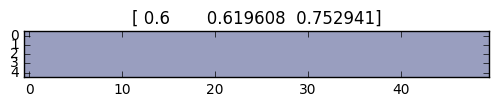

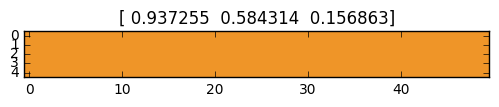

In [3]:
for s, c in colors.iteritems():
    v = np.zeros((5,50,3))
    v[:, :] = np.array(c)
    plt.imshow(v)
    plt.title(str(c))
    plt.show()

In [91]:
atlas_name = 'atlasV2'

In [92]:
high_contrast_colors = np.random.permutation(high_contrast_colors)
map_name_s_to_color = {s: np.array(high_contrast_colors[i%len(high_contrast_colors)]) 
                     for i, s in enumerate(all_known_structures_sided) }
map_name_u_to_color = {s: np.array(high_contrast_colors[i%len(high_contrast_colors)]) 
                     for i, s in enumerate(all_known_structures) }

In [93]:
stack_colors = {n: np.array(high_contrast_colors[i%len(high_contrast_colors)]) for i, n in enumerate(all_stacks)}

# Genrate mesh for subject volume mapped back to atlas space

In [49]:
classifier_setting = 2

In [23]:
warp_setting = 3

In [9]:
# Render globally transformed atlas structures

for stack in all_nissl_stacks:
# for stack in ['MD590']:
    
    for structure in all_known_structures_sided:
#     for structure in ['7N_L']:

        print structure
        
        try:
            reversed_volume = \
        DataManager.load_transformed_volume(stack_m=atlas_name, stack_f=stack,
                                           classifier_setting_m=classifier_setting,
                                           classifier_setting_f=classifier_setting,
                                           warp_setting=warp_setting,
                                           structure=structure)

        #     xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(reversed_volume)
        #     vol = reversed_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1]

        #     dense_vol = fill_sparse_score_volume(vol)

            t = time.time()

            polydata = volume_to_polydata(reversed_volume, origin=(0,0,0), num_simplify_iter=3, smooth=True, level=.5)

            sys.stderr.write('time: %.2f\n' % (time.time() - t)) # 10s

            mesh_fn = DataManager.get_transformed_volume_mesh_filepath(stack_m=atlas_name, stack_f=stack,
                                                                      classifier_setting_m=classifier_setting,
                                                                      classifier_setting_f=classifier_setting,
                                                                      warp_setting=warp_setting,
                                                                      structure=structure)

            save_mesh(polydata, mesh_fn)
            
        except Exception as e:
            sys.stderr.write('%s\n' % e)
            sys.stderr.write('Error transforming volume %s.\n' % structure)

5N_L


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/usr/lib/python2.7/inspect.py", line 497, in getmodule
    f = getabsfile(module)
  File

IndexError: string index out of range

# Load

In [94]:
# AtlasV2

# Load locally transformed atlas structure meshes

reversed_polydata_list = {stack: \
                          DataManager.load_meshes(stack_m=atlas_name, stack_f=stack,
                                                                   classifier_setting_m=classifier_setting,
                                                                   classifier_setting_f=classifier_setting,
                                                                   warp_setting=warp_setting,
                                                                   return_polydata_only=True,
                                                                    sided=True)
                          for stack in all_nissl_stacks}

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0_SNC_R.stl
Mesh is empty: SNC_R.
Error loading mesh for SNC_R.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_dow

In [95]:
for st, x in reversed_polydata_list.iteritems():
    print st, '\t', set(all_known_structures_sided) - set(x.keys())

MD602 	set(['outerContour', 'PBG_R', 'sp5'])
MD603 	set(['VCA_L', 'outerContour', '7N_R', 'PBG_L', 'sp5', '7N_L', 'LRt_L'])
MD592 	set(['outerContour', 'sp5'])
MD593 	set(['outerContour', 'PBG_L', 'sp5'])
MD590 	set(['outerContour', 'sp5'])
MD591 	set(['outerContour', 'sp5'])
MD585 	set(['SNC_R', 'outerContour', 'sp5'])
MD594 	set(['outerContour', 'sp5'])
MD595 	set(['outerContour', 'PBG_L', 'SNC_L', 'sp5'])
MD589 	set(['outerContour', 'sp5'])
MD598 	set(['outerContour', 'sp5'])
MD599 	set(['outerContour', 'sp5'])


In [96]:
ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax = \
DataManager.load_volume_bbox(stack='MD589', type='annotation', downscale=32, classifier_setting=classifier_setting)

print 'annotation volume bbox :', ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax

annotation volume bbox : 622 1042 155 502 127 503


In [97]:
shell_polydata = DataManager.load_shell_mesh(stack='MD589', downscale=32)

In [28]:
# Load atlas meshes

In [99]:
# Load canonical info
# AtlasV2
basename = DataManager.get_original_volume_basename(stack=atlas_name)
canonical_centroid = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, basename, 'canonical_centroid.txt'))
# AtlasV3
# basename = DataManager.get_original_volume_basename(stack='atlasV3')
# canonical_centroid = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'))
# canonical_locations = read_dict_from_txt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'), key_converter=str)
# canonical_normal = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

In [103]:
from data_manager import *

In [105]:
# Load atlas meshes

#atlasV2
atlas_space_structure_meshes = DataManager.load_meshes_atlasV2(stack_m=atlas_name, sided=True, trial_idx=None)

# AtlasV3
# atlas_space_structure_meshes = DataManager.load_meshes(stack_m=atlas_name, sided=True, trial_idx=None)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.


In [16]:
# # Load atlas structure surround meshes

# atlas_space_structure_surround_meshes = DataManager.load_meshes(stack=atlas_name, \
#                                         labels=[n + '_surround' for n in structures_sided])

In [106]:
# Create actors

all_atlas_structure_mesh_actors = {n: actor_mesh(polydata, color=map_name_u_to_color[convert_to_unsided_name(n)]/255.,
                                             wireframe=False,
                                                 opacity=.6,
                                              origin=canonical_centroid) 
                                   for n, polydata in atlas_space_structure_meshes.iteritems()}

In [107]:
# all_atlas_structure_surround_mesh_actors = [actor_mesh(polydata, color=(0,1,0),
#                                                       wireframe=True,
#                                                       origin=canonical_centroid) 
#                                             for n, polydata in atlas_space_structure_surround_meshes.iteritems()]
    
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.15, wireframe=False)

In [135]:
# atlas + shell
launch_vtk(all_atlas_structure_mesh_actors.values() + [shell_actor])

In [110]:
all_reversed_structure_actors = {st: [actor_mesh(p, 
                       wireframe=False, 
#                        color=structure_colors[convert_name_to_unsided(n)]/255., 
#                         color=(0,1,0), 
#                         color=stack_colors[st]/255.,
                        color=map_name_u_to_color[convert_to_original_name(n)]/255.,
                        opacity=.3,
                      origin=(ann_vol_xmin, 
                              ann_vol_ymin, 
                              ann_vol_zmin))
                                      for n, p in ps.iteritems() if n not in outliers or st not in outliers[n]]
            for st, ps in reversed_polydata_list.iteritems()
                                if st in all_nissl_stacks}

In [36]:
# Diff. structure diff. opacity.

def map_name_to_opacity(name):
    if name in ['7N_L', '7N_R', '5N_L', '5N_R', '12N', 'Pn_L', 'Pn_R', 'LC_L', 'LC_R', 'Amb_L', 'Amb_R',
               'Tz_L', 'Tz_R', '3N_L', '3N_R', '4N_L', '4N_R', 'RMC_L', 'RMC_R', '10N_L', '10N_R']:
        opacity = .5
    else:
        opacity = 0.01
    return opacity

all_reversed_structure_actors = {st: [actor_mesh(p, 
                       wireframe=False, 
#                        color=structure_colors[convert_name_to_unsided(n)]/255., 
#                         color=(0,1,0), 
#                         color=stack_colors[st]/255.,
                        color=map_name_u_to_color[convert_to_original_name(n)]/255.,
                        opacity=map_name_to_opacity(n),
                      origin=(ann_vol_xmin, 
                              ann_vol_ymin, 
                              ann_vol_zmin))
                                      for n, p in ps.iteritems() if n not in outliers or st not in outliers[n]]
            for st, ps in reversed_polydata_list.iteritems()
                                if st in all_nissl_stacks}

In [114]:
# atlas + shell + all specimens
launch_vtk(
    all_atlas_structure_mesh_actors.values() + \
           [shell_actor] + \
           sum(all_reversed_structure_actors.values(), []))

# Identify Outliers

In [129]:
outliers = {st: [] for st in all_nissl_stacks}

outliers = {}
with open('/home/yuncong/Brain/outliers.txt', 'r') as f:
    for line in f.readlines():
        elements = line.split()
        outliers[elements[0]] = elements[1:]
        
# outliers['Sp5C_L'] = ['MD602', 'MD593', 'MD595', 'MD603', 'MD599']
# outliers['5N_L'] = ['MD603']

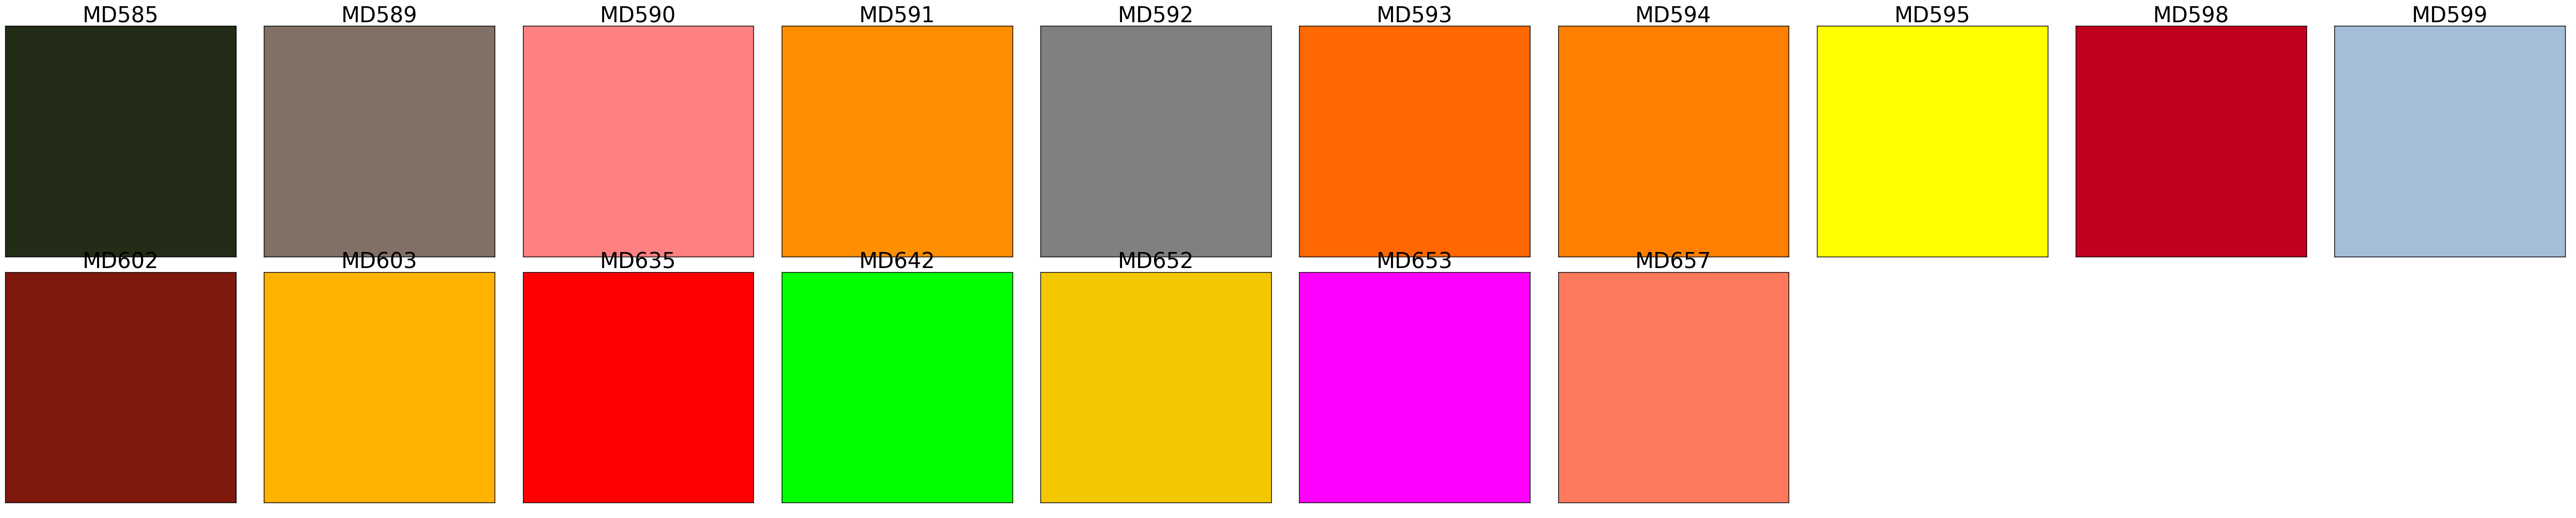

In [130]:
# Stack color table

titles = sorted(stack_colors.keys())
vizs = []
for s, c in sorted(stack_colors.items()):
    v = np.zeros((1,1,3))
    v[:, :] = np.array(c/255.)
    vizs.append(v)
    
display_images_in_grids(vizs, nc=10, titles=titles)

In [131]:
# names_of_interest = ['7N_L', '7N_R', '5N_L', '5N_R', '12N', 'Tz_L', 'Tz_R', '7n_L', '7n_R', 'LRt_L', 'LRt_R',
#                     'Pn_L', 'Pn_R', 'SNR_L', 'SNR_R']

# names_of_interest = ['7N_L']
# names_of_interest = ['Sp5C_R']
names_of_interest = ['5N_L']

# names_of_interest = [n for n in structures_sided \
#                      if '_L' not in n and \
#                      convert_name_to_unsided(n) not in ['AP', 'DC', 'Sp5O', 'Sp5I', 'Sp5C', 'RtTg', 'VCP', 'VCA']]

particular_reversed_structure_actors_all = {}

for name_s_interest in names_of_interest:
    
    if name_s_interest in outliers:
        print 'Outlier stack for %s:' % name_s_interest, outliers[name_s_interest]
        
    particular_reversed_structure_actors = [actor_mesh(p, 
                           wireframe=True, 
    #                        color=structure_colors[convert_name_to_unsided(n)]/255., 
                            color=stack_colors[st]/255.,
                           opacity=1.,
                          origin=(ann_vol_xmin, 
                                  ann_vol_ymin, 
                                  ann_vol_zmin))
                for st, ps in reversed_polydata_list.iteritems() for n, p in ps.iteritems() 
                                            if n == name_s_interest and \
                                            (name_s_interest not in outliers or st not in outliers[name_s_interest])]
    
    particular_reversed_structure_actors_all[name_s_interest] = particular_reversed_structure_actors
    
launch_vtk(
#     [all_atlas_structure_mesh_actors[n] for n in names_of_interest] + \
           [shell_actor] + \
           sum(particular_reversed_structure_actors_all.values(), []), init_angle='horizontal_topDown')

Outlier stack for 5N_L: ['MD602', 'MD603', 'MD592', 'MD591', 'MD594', 'MD589', 'MD599']


In [132]:
all_reversed_structure_actors = {st: [actor_mesh(p, 
                       wireframe=False, 
#                        color=structure_colors[convert_name_to_unsided(n)]/255., 
#                         color=(0,1,0), 
                        color=stack_colors[st]/255.,
                       opacity=.3,
                      origin=(ann_vol_xmin, 
                              ann_vol_ymin, 
                              ann_vol_zmin))
                                      for n, p in ps.iteritems() if n not in outliers or st not in outliers[n]]
            for st, ps in reversed_polydata_list.iteritems()}

In [133]:
launch_vtk(all_atlas_structure_mesh_actors.values() + all_reversed_structure_actors['MD602'] + \
           [shell_actor])

In [134]:
launch_vtk(all_atlas_structure_mesh_actors.values() + sum(all_reversed_structure_actors.values(), []) + \
           [shell_actor])